In [13]:
from tensorflow.keras.datasets import reuters

In [14]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [15]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [23]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [24]:
from tensorflow.keras import models, layers

In [25]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [26]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [23]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 23ms/step - loss: 2.5597 - accuracy: 0.5109 - val_loss: 1.6657 - val_accuracy: 0.6500
Epoch 2/20
16/16 [==============================] - 0s 14ms/step - loss: 1.3553 - accuracy: 0.7196 - val_loss: 1.2655 - val_accuracy: 0.7410
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 0.9992 - accuracy: 0.7889 - val_loss: 1.1000 - val_accuracy: 0.7680
Epoch 4/20
16/16 [==============================] - 0s 13ms/step - loss: 0.7801 - accuracy: 0.8371 - val_loss: 1.0050 - val_accuracy: 0.8010
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.6259 - accuracy: 0.8711 - val_loss: 0.9456 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4932 - accuracy: 0.9014 - val_loss: 0.9167 - val_accuracy: 0.8130
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4007 - accuracy: 0.9181 - val_loss: 0.8918 - val_accuracy: 0.8110
Epoch 8/20
16

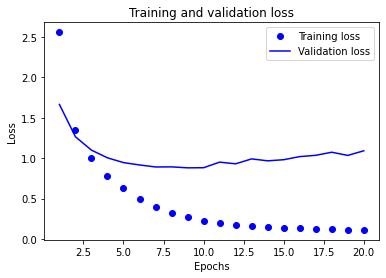

In [24]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

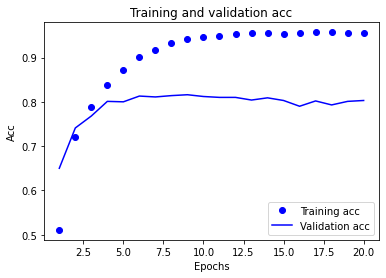

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

### 에폭크를 9로 줄여서 과적합 방지

In [27]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 0s 24ms/step - loss: 2.6485 - accuracy: 0.5454 - val_loss: 1.7560 - val_accuracy: 0.6360
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 1.4361 - accuracy: 0.7005 - val_loss: 1.3226 - val_accuracy: 0.7120
Epoch 3/9
16/16 [==============================] - 0s 15ms/step - loss: 1.0656 - accuracy: 0.7734 - val_loss: 1.1680 - val_accuracy: 0.7520
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 0.8437 - accuracy: 0.8247 - val_loss: 1.0879 - val_accuracy: 0.7720
Epoch 5/9
16/16 [==============================] - 0s 15ms/step - loss: 0.6781 - accuracy: 0.8576 - val_loss: 0.9976 - val_accuracy: 0.7950
Epoch 6/9
16/16 [==============================] - 0s 18ms/step - loss: 0.5479 - accuracy: 0.8870 - val_loss: 0.9352 - val_accuracy: 0.8160
Epoch 7/9
16/16 [==============================] - 0s 18ms/step - loss: 0.4435 - accuracy: 0.9088 - val_loss: 0.9375 - val_accuracy: 0.8110
Epoch 8/9
16/16 [===

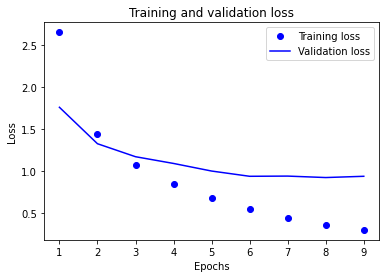

In [28]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

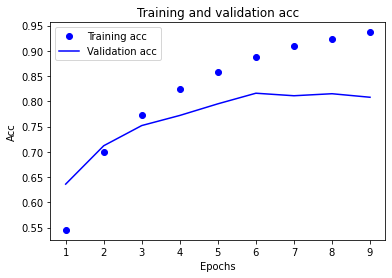

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [31]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

71/71 [==============================] - 0s 2ms/step - loss: 1.0175 - accuracy: 0.7858
[1.0174665451049805, 0.7858415246009827]


### 다른 데이터에 적용하는 방법

In [32]:
predictions = model.predict(x_test)

In [35]:
predictions[0].shape

(46,)

In [36]:
np.sum(predictions[0])

1.0

In [39]:
np.argmax(predictions[0])

3

### 중간층의 수가 출력층보다 많이 작을때

In [40]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 0s 26ms/step - loss: 3.6964 - accuracy: 0.0407 - val_loss: 3.5600 - val_accuracy: 0.0440
Epoch 2/9
16/16 [==============================] - 0s 16ms/step - loss: 3.4375 - accuracy: 0.0438 - val_loss: 3.3763 - val_accuracy: 0.0460
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 3.2269 - accuracy: 0.0454 - val_loss: 3.1951 - val_accuracy: 0.0470
Epoch 4/9
16/16 [==============================] - 0s 16ms/step - loss: 3.0170 - accuracy: 0.0601 - val_loss: 3.0029 - val_accuracy: 0.0740
Epoch 5/9
16/16 [==============================] - 0s 16ms/step - loss: 2.7834 - accuracy: 0.0943 - val_loss: 2.7788 - val_accuracy: 0.1060
Epoch 6/9
16/16 [==============================] - 0s 28ms/step - loss: 2.5111 - accuracy: 0.2078 - val_loss: 2.5172 - val_accuracy: 0.2450
Epoch 7/9
16/16 [==============================] - 0s 17ms/step - loss: 2.2144 - accuracy: 0.2865 - val_loss: 2.2541 - val_accuracy: 0.2900
Epoch 8/9
16/16 [===

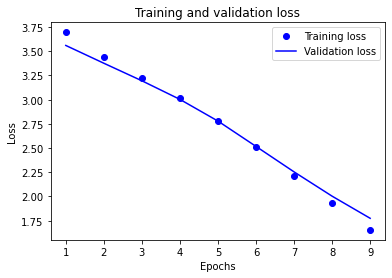

In [41]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

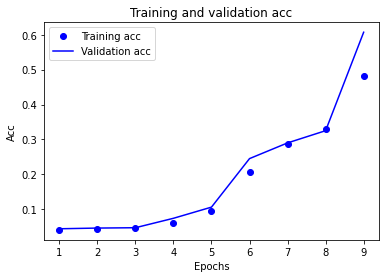

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

In [43]:
results = model.evaluate(x_test, one_hot_test_labels)
print(results)

71/71 [==============================] - 0s 3ms/step - loss: 1.8782 - accuracy: 0.5841
[1.8781757354736328, 0.5841495990753174]
